## Sentiment Analysis
### Sentiment Analysis

In [3]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
Amanda Seales,"Now, y’all keep asking me, “Amanda, who is thi..."
Bert Kreischer,[electronic music playing] [male announcer] La...
Marc Maron,[audience chattering indistinctly] [man] Ladie...
Pete Davidson,"So, Louis C.K. tried to get me fired from SNL ..."
Stewart Lee,This programme contains very strong language a...


In [4]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
Amanda Seales,"Now, y’all keep asking me, “Amanda, who is thi...",0.100902,0.431038
Bert Kreischer,[electronic music playing] [male announcer] La...,-0.000885,0.497054
Marc Maron,[audience chattering indistinctly] [man] Ladie...,0.022203,0.533448
Pete Davidson,"So, Louis C.K. tried to get me fired from SNL ...",0.057124,0.580751
Stewart Lee,This programme contains very strong language a...,0.073491,0.477918


In [20]:
data.index[0]

'Amanda Seales'

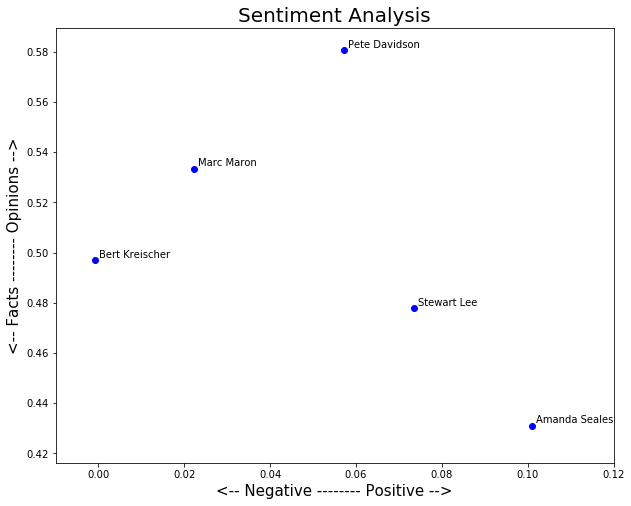

In [22]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data.index[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()



### Sentiment of Routine Over Time
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [23]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Now, y’all keep asking me, “Amanda, who is this special for?” And I keep telling y’all, “It’s for my sisters!” But it’s comedy, so it’s really for everybody. Okay, maybe not for everybody. Everybody except for racists, rapists, sexists, misogynists, narcissists. You know, folks that are callin’ the cops on black folks just livin’ our lives. Yeah, it ain’t for you. It ain’t for fuck boys, or trife gals, or that one ex, who still ain’t paid you that money back he owes you. Uh-huh. No laughs for them. It ain’t for Trump voters, or coons, or… people who don’t believe that white men can be terrorists. It ain’t for homophobes, or transphobes, or xenophobes. You know that wall is some bullshit. Hmm. It ain’t for bullies, it ain’t for poachers, it ain’t for abusers. It ain’t for people who keep asking me, “Amanda, can I pick your brain?” No! It ain’t for dudes who want head but don’t wanna eat no pussy! It ain’t for you! It also is not for people who don’t take care of their kids. It ain’t 

In [27]:
# The list has 10 elements, one for each transcript
len(list_pieces)


# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [29]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
# polarity_transcript

In [33]:
# Show the plot for one comedian
# plt.plot(polarity_transcript[0])
# plt.title(data.index[0])
# plt.show()

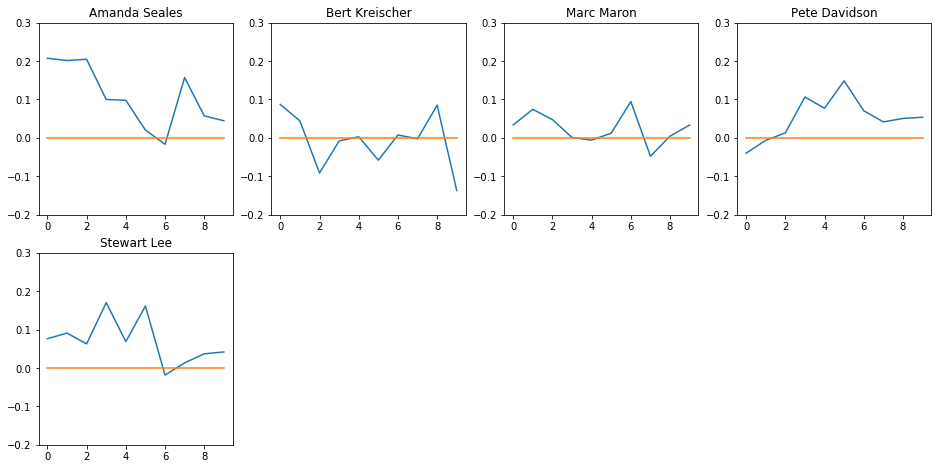

In [35]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data.index[index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()